# Chatbot
- [reference] https://python.langchain.com/v0.2/docs/tutorials/chatbot/


## Quickstart

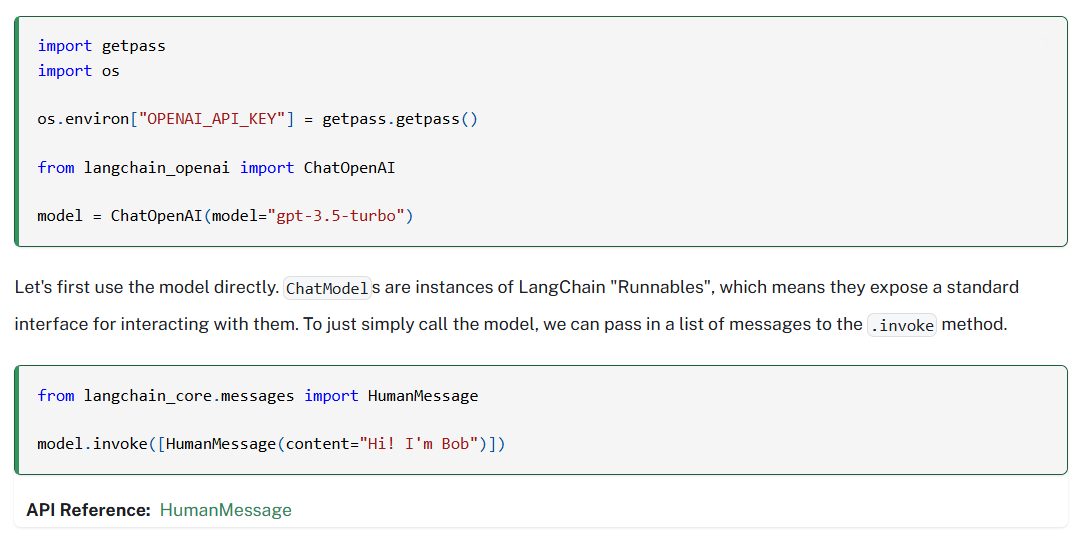

In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
model = ChatOpenAI(model='gpt-4.1-nano')
model

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000002226D23D6F0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000002226D258490>, root_client=<openai.OpenAI object at 0x000002226A4BC130>, root_async_client=<openai.AsyncOpenAI object at 0x000002226D23D7B0>, model_name='gpt-4.1-nano', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [5]:
ai_message = model.invoke([HumanMessage(content='Hi! I am Bob~')])

In [6]:
ai_message

AIMessage(content='Hello, Bob! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_eede8f0d45', 'id': 'chatcmpl-Bc0OYLALmG8PGdVTsevUWRgI7X1Km', 'finish_reason': 'stop', 'logprobs': None}, id='run-14927576-9016-4aa1-ba05-29ac2e4b4b55-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [7]:
ai_message.content

'Hello, Bob! Nice to meet you. How can I assist you today?'

In [8]:
ai_message_02 = model.invoke('What is my name?')
ai_message_02

AIMessage(content="I'm sorry, but I don't know your name. How may I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 12, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-Bc0Oe7gWHcwHO4fBkZVWtG0bmRgY5', 'finish_reason': 'stop', 'logprobs': None}, id='run-2cef9d25-664b-437e-96ac-52f7269e90ae-0', usage_metadata={'input_tokens': 12, 'output_tokens': 17, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
ai_message_03 = model.invoke([HumanMessage('What is my name?')])
ai_message_03

AIMessage(content="I'm sorry, but I don't know your name.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_eede8f0d45', 'id': 'chatcmpl-Bc0OgOot6299IQZDY5KArxWLHiqRM', 'finish_reason': 'stop', 'logprobs': None}, id='run-22203416-96fb-4f94-886c-a2af55d0013a-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [11]:
 from langchain_core.messages import AIMessage

ai_message_04 = model.invoke(
	[
		HumanMessage(content="Hi! I am Bob"),
		AIMessage(content="Hello Bob! How can I assist you today?"),
		HumanMessage(content="What's my name?"),
	]
)

In [12]:
ai_message_04

AIMessage(content='Your name is Bob.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 34, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-Bc0V1wzX5Zk93Lj5LPfZzhj3Bvcak', 'finish_reason': 'stop', 'logprobs': None}, id='run-fe520d69-2661-4b08-9f5b-688d20f3fa4f-0', usage_metadata={'input_tokens': 34, 'output_tokens': 5, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
ai_message_04.content


'Your name is Bob.'

## Message History
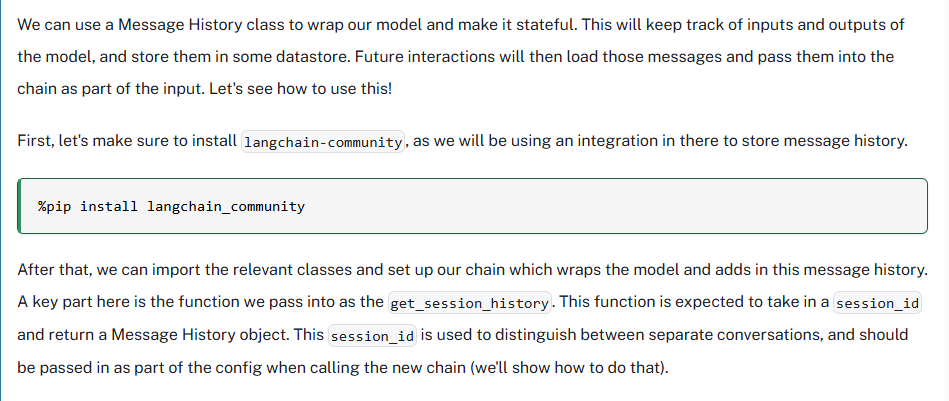

In [ ]:
from langchain_core.chat_history import(
	BaseChatMessageHistory,
	InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
	if session_id not in store:
		store[session_id] = InMemoryChatMessageHistory()
	return store[session_id]


with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [ ]:
config = {"configurable": {"session_id": "abc2"}}

response = with_message_history.invoke(
	[HumanMessage(content="Hi! I m  Bob")],
	config=config,
)

response.content
	

'Hello, Bob! Nice to meet you. How can I assist you today?'

In [ ]:
response = with_message_history.invoke(
  [HumanMessage(content="What's my name?")],
  config=config,
)

response.content

'Your name is Bob.'

### [문제] 대화 이력(message history)에서 첫 번째 질문(Human Message) 출력

In [18]:
## 대화 이력
get_session_history('abc2')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I m  Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, Bob! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_eede8f0d45', 'id': 'chatcmpl-Bc0iklkNlwWWb9NRAlEuiYgWlp0gC', 'finish_reason': 'stop', 'logprobs': None}, id='run-bf86bbe1-84a2-4395-b445-6ff307540cc4-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content="What's my name?", additional

In [19]:
get_session_history('abc2').messages

[HumanMessage(content='Hi! I m  Bob', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello, Bob! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_eede8f0d45', 'id': 'chatcmpl-Bc0iklkNlwWWb9NRAlEuiYgWlp0gC', 'finish_reason': 'stop', 'logprobs': None}, id='run-bf86bbe1-84a2-4395-b445-6ff307540cc4-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content="What's my name?", additional_kwargs={}, response_metadata={}),

In [20]:
## 첫 번째 질문(HumanMessage) 출력
type(get_session_history('abc2').messages)


list

In [24]:
get_session_history('abc2').messages[0]

HumanMessage(content='Hi! I m  Bob', additional_kwargs={}, response_metadata={})

In [ ]:
get_session_history('abc2').messages[0].content


'Hi! I m  Bob'

In [25]:
config = {"configurable": {"session_id": "abc3"}}

response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

"I'm sorry, but I don't know your name. How can I assist you today?"

In [26]:
len(store)

2

In [28]:
store.keys()

dict_keys(['abc2', 'abc3'])

In [30]:
get_session_history('abc3')

InMemoryChatMessageHistory(messages=[HumanMessage(content="What's my name?", additional_kwargs={}, response_metadata={}), AIMessage(content="I'm sorry, but I don't know your name. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 11, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_eede8f0d45', 'id': 'chatcmpl-Bc1SmoDMoTBcxhNHAU5LRvGFZOGAY', 'finish_reason': 'stop', 'logprobs': None}, id='run-e722c7e7-335a-4b34-83ff-9cd34af2e340-0', usage_metadata={'input_tokens': 11, 'output_tokens': 17, 'total_tokens': 28, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [34]:
for message in get_session_history('abc3').messages:
    print(message.content)

What's my name?
I'm sorry, but I don't know your name. How can I assist you today?


## Prompt templates

In [42]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Answer all questions to the best of your ability.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

chain = prompt | model

In [43]:
response = chain.invoke({"messages": [HumanMessage(content="hi! I'm bob")]})

response.content

'Hello, Bob! Nice to meet you. How can I assist you today?'

In [44]:
len(store)

2

In [ ]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)
config = {'configurable': {'session_id': 'abc5'}}
response = with_message_history.invoke(
	[HumanMessage(content='Hi! I am Jim')],
	config=config,
)

response.content

'Hello, Jim! Nice to meet you. How can I assist you today?'

In [49]:
len(store)

3

In [51]:
store.keys()

dict_keys(['abc2', 'abc3', 'abc5'])

In [53]:
get_session_history('abc5')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, Jim! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 32, 'total_tokens': 48, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-Bc2pqab6JA2HYIK1vQO6mQbf5aQmC', 'finish_reason': 'stop', 'logprobs': None}, id='run-d4e94719-5796-4d4b-910f-ad6747a075a7-0', usage_metadata={'input_tokens': 32, 'output_tokens': 16, 'total_tokens': 48, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content="What's my name?", additional

In [54]:
response

AIMessage(content='Your name is Jim.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 60, 'total_tokens': 65, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-Bc2qBChHoLy2GUIGQ2JWRflYpiyDx', 'finish_reason': 'stop', 'logprobs': None}, id='run-d9253bbd-fcfd-4b9e-b04a-50bddb6a6b01-0', usage_metadata={'input_tokens': 60, 'output_tokens': 5, 'total_tokens': 65, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [55]:
with_message_history

RunnableWithMessageHistory(bound=RunnableBinding(bound=RunnableBinding(bound=RunnableLambda(_enter_history), kwargs={}, config={'run_name': 'load_history'}, config_factories=[])
| RunnableBinding(bound=RunnableLambda(_call_runnable_sync), kwargs={}, config={'run_name': 'check_sync_or_async'}, config_factories=[]), kwargs={}, config={'run_name': 'RunnableWithMessageHistory'}, config_factories=[]), kwargs={}, config={}, config_factories=[], get_session_history=<function get_session_history at 0x000002226E414160>, history_factory_config=[ConfigurableFieldSpec(id='session_id', annotation=<class 'str'>, name='Session ID', description='Unique identifier for a session.', default='', is_shared=True, dependencies=None)])

In [56]:
response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

'Your name is Jim.'

In [62]:
for message in get_session_history('abc5').messages:
	print(f'[{message.type.upper()}]: {message.content}')


[HUMAN]: Hi! I am Jim
[AI]: Hello, Jim! Nice to meet you. How can I assist you today?
[HUMAN]: What's my name?
[AI]: Your name is Jim.
[HUMAN]: What's my name?
[AI]: Your name is Jim.


In [64]:
get_session_history('abc5').messages[0]

HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={})

In [65]:
get_session_history('abc5').messages[0].type

'human'

In [66]:
get_session_history('abc5').messages[0].type.upper()

'HUMAN'

In [70]:
prompt = ChatPromptTemplate.from_messages(
  [
    (
      'system',
      'You are a helpful assistant. Answer all questions to the best of your ability in {language}.'
	),
	MessagesPlaceholder(variable_name='messages'),
  ]
)

chain = prompt | model

In [71]:
response = chain.invoke(
    {"messages": [HumanMessage(content="hi! I'm bob")], "language": "Spanish"}
)

response.content

'¡Hola, Bob! Encantado de conocerte. ¿En qué puedo ayudarte hoy?'

In [72]:
with_message_history = RunnableWithMessageHistory(
	chain,
	get_session_history,
	input_messages_key='messages',
)

config = {'configurable': {'session_id': 'abc11'}}

response = with_message_history.invoke(
	{'messages': [HumanMessage(content='hi! I m todd')], 'language': 'spanish'},
	config=config,
)

response.content

'¡Hola, Todd! Mucho gusto. ¿En qué puedo ayudarte hoy?'

In [73]:
response = with_message_history.invoke(
    {"messages": [HumanMessage(content="whats my name?")], "language": "Spanish"},
    config=config,
)

response.content

'Tu nombre es Todd.'

In [74]:
get_session_history('abc11')

InMemoryChatMessageHistory(messages=[HumanMessage(content='hi! I m todd', additional_kwargs={}, response_metadata={}), AIMessage(content='¡Hola, Todd! Mucho gusto. ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 34, 'total_tokens': 50, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_eede8f0d45', 'id': 'chatcmpl-Bc4Qe20FTcZR0FtvwHWbd4Pl46Usy', 'finish_reason': 'stop', 'logprobs': None}, id='run-9d2452b8-fae1-4dc4-b27f-56f776e81a2c-0', usage_metadata={'input_tokens': 34, 'output_tokens': 16, 'total_tokens': 50, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='whats my name?', additional_kwar

## Managing Conversation History

In [ ]:
from langchain_core.messages import SystemMessage, trim_messages

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)